In [12]:
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
import os
import cv2
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt

In [13]:
from skimage.color import rgb2gray

In [14]:
image_names = []
label_names = []
training_dir = "/scratch/toml/sn7/train"
for location in os.listdir(training_dir):
    label_path = f"{training_dir}/{location}/global_monthly_2018_01_mosaic_{location}_Buildings_cropped.tif"
    label_names.append(label_path)
    # reference TCI image
    image_path = f"{training_dir}/{location}/images/ref/TCI.tif"
    image_names.append(image_path)


In [22]:
# images = [cv2.imread(image_name) for image_name in image_names]
upscale = 6
images = []
for image_name in image_names:
    image = cv2.imread(image_name)
    image = rgb2gray(image)
    image = cv2.resize(image, (image.shape[0]*upscale, image.shape[1]*upscale))
    image = image[:256, :256].astype(np.uint8)
    images.append(image)


# labels = [cv2.imread(label_name) for label_name in label_names]
labels = []
for label_name in label_names:
    with rio.open(label_name) as src:
        label = src.read(1)
    # label = rgb2gray(label)
    label = label[:256, :256].astype(np.uint8)
    # check if smaller than 256x256
    if label.shape[0] < 256 or label.shape[1] < 256:
        # pad with zeros
        label = np.pad(label, ((0, 256-label.shape[0]), (0, 256-label.shape[1])), 'constant', constant_values=0)
    labels.append(label)

In [23]:
for i in labels:
    print(i.shape, i.dtype)

(256, 256) uint8
(256, 256) uint8
(256, 256) uint8
(256, 256) uint8
(256, 256) uint8
(256, 256) uint8
(256, 256) uint8
(256, 256) uint8
(256, 256) uint8
(256, 256) uint8
(256, 256) uint8
(256, 256) uint8
(256, 256) uint8
(256, 256) uint8
(256, 256) uint8
(256, 256) uint8
(256, 256) uint8


In [24]:
image_dataset = np.array(images)
labels_dataset = np.array(labels)
# image_dataset = np.expand_dims(image_dataset, axis=3)

In [25]:
# # plot image n and label n in subplots
# n = 2
# fig, ax = plt.subplots(1,2)
# ax[0].imshow(images[n])
# ax[1].imshow(labels[n])
# for i,l in zip(images, labels):
#     print(i.shape, l.shape)

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(image_dataset.reshape(-1,1))
image_dataset = scaler.transform(image_dataset.reshape(-1,1)).reshape(image_dataset.shape)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(image_dataset, labels_dataset, test_size=0.2, random_state=42)

In [28]:
# print info about image_dataset, labels_dataset, X_train, X_test, y_train, y_test
print("image_dataset shape:", image_dataset.shape)
print("labels_dataset shape:", labels_dataset.shape)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


image_dataset shape: (17, 256, 256)
labels_dataset shape: (17, 256, 256)
X_train shape: (13, 256, 256)
X_test shape: (4, 256, 256)
y_train shape: (13, 256, 256)
y_test shape: (4, 256, 256)


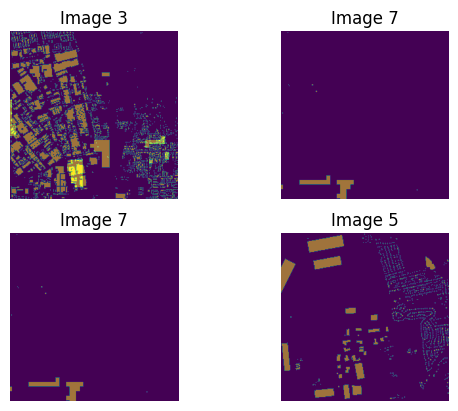

In [30]:
# plot random set of images and labels
fig, ax = plt.subplots(1,2)
for i in range(2):
    n = np.random.randint(0, X_train.shape[0])
    ax[i,1].imshow(X_train[n])
    ax[i,2].imshow(y_train[n], alpha=0.5)
    ax[i,1].set_title(f"Image {n}")
    ax[i,2].set_axis_off()